# Section 5.4: Non-fluctuating interaction between surface water and groundwater

## The error function erf and complementary error function erfc

Syllabus IHE, Delft

@T.N.Olsthoorn 2020-01-06

The complementary error fucntion $\mbox{erfc}$ function is used in solutions that involve the impace of sudden changes of the surface water stage level on the adjacent groundwater, in cases where the groudwater aquifer is in direct contact with the surface water (i.e. there is no hydraulic resistance between the surface water and the aquifer).

Special functions that are not availal in numpy, are generally available in the scipy.special module. This holds true for error functions, bessel function, exponential intergrals and so on.

Below we explore a little the complementary error function.

In [1]:
# Load required functionality

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

In [2]:
# Setup for flexivle and convenient visualization

def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
                   xscale='linear', yscale='linear', size_inches=(14, 8)):
    '''Setup a new axis for plotting'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.grid(True)
    return ax

## Comparison between the error function erf(u) and the complementary error function erfc(u)

The error function is defined by
$$ \mbox{erf}(z) = \frac 2 {\sqrt{\pi}} \intop_0^z e^{-t^2} dt$$

And the complementary error function as
$$ \mbox{erfc}(z) = \frac {2}{\sqrt{\pi}} \intop_z^\infty e^{-t^2} dt$$

Because $\mbox{erf}(\infty) = 1$, it follows that

$$\mbox{erf}(z) + \mbox{erfc}(z) = 1$$

and, of course, that

$$ \mbox{efc}(z) = 1 - \mbox{erf}(z)$$

And although Excel does not provide values for the erfc fucntion for $z<0$, there is in fact no reason why negative values of $z$ would not be valid.

Let's plot the two functions.

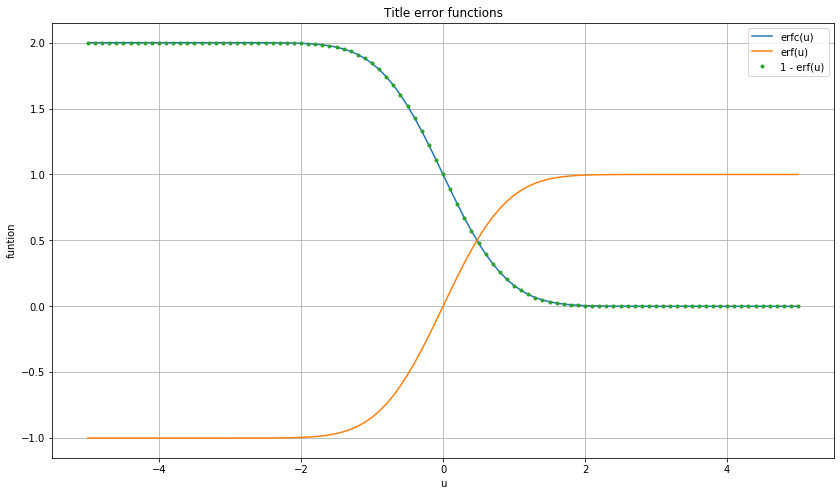

In [15]:
# The erf and erfc functions

u = np.linspace(-5, 5, 101)

ax = newfig('Title error functions', 'u', 'funtion')

ax.plot(u, sp.erfc(u), label='erfc(u)')
ax.plot(u, sp.erf( u), label='erf(u)')
ax.plot(u, 1 - sp.erf(u), '.', label='1 - erf(u)')
ax.legend()

Note that for our groundwater problems, we will always use

$$\mbox{erfc}(u) \,\, \mbox{where} \,\, u=\sqrt{\frac {x^2 S}{4 kD t}}$$

and, therefore, where $u \ge 0$. The $\mbox{erfc(u)$ function will then be limited to

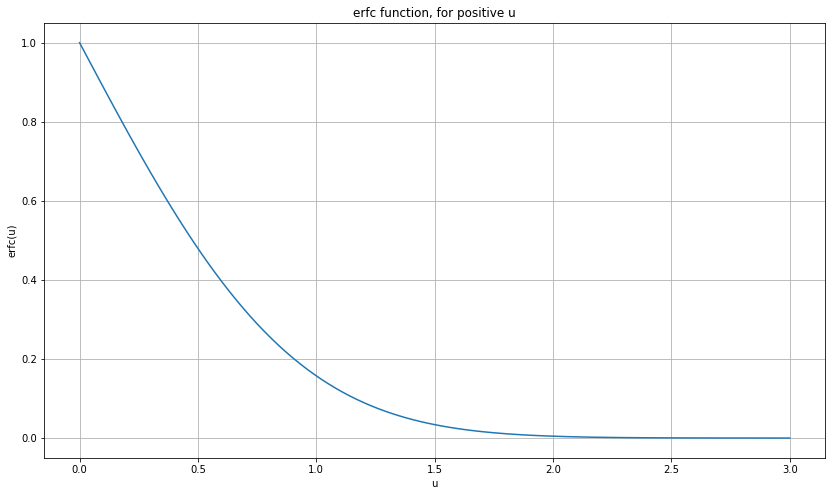

In [19]:
ax = newfig('erfc function, for positive u', 'u', 'erfc(u)')

u = np.linspace(0, 3, 101)
ax.plot(u, sp.erfc(u))


The erfc function starts at 1 and rapidly declines to zero. The shape of this curve contains all solutions to the sudden change of the head at $x=0$ at $t=0$.

In fact, one could write
$$ u = \sqrt{\frac {x^2 S} {4 kD t}} = \sqrt{\frac T t}$$
where $T = \frac{x^2 S}{4 kD}$ can be regarded as a characteristic time for the groundwater behavior at some fixed distance $x$.

We could also write
$$ u = \sqrt{\frac {x^2 S}{4 kD t}} = \frac x X $$

where $X = \sqrt{\frac {4 kD t}{S}}$ can be regarded as a characteristic distance for the groundwater behavior at some fixed time $t$

From the graph we see that for $u=1$ the drawdown is about half of its final value. This is, therefore, the case $t=T$ and as $x=X$. So to see at which time $t$ at some fixed point $x$ the change in groundwater head is about half its final values, just compute $T$. To see at which distance $x$ the drawdown is about half of the value of the sudden head change at $x=0$, just compute the value of $X$ at time $t$. This perspective is, therefore, very handy when one has to estimate the behavior of a given groundwater system driven by head changes at a given location.

It also implies that if one has times series of measured groundwater head changes at different distances from a river in which a sudden change of stage has occurred at some time, all these graphs should collapse to a single graph of plotted versus $\sqrt{\frac T t}$ instead of versus $\sqrt{\frac{x^2 S}{4 kD t}}$.

## Question: Given a distance, $x$ from the river, after how much time has the  head change at $x$ reached half its final value that is dictated by the change of stage in the river?

This answer is now simple and straightforward. Looking at the graph of $\mbox{erfc}(u)$, we see that half the final value is reached at $u \approx 0.5$. Hence,

$$ u = \sqrt{ \frac {x^2 S} {4 kD t} } \approx 0.5$$

so that

$$ t_{0.5} \approx \frac {x^2 S} {kD} $$

This time could be called "characteristic time" for this distance given
this groundwater system. However we defined characteristic time a bit different by using

$$ u = \sqrt{\frac {x^2 S} {4 kD t}} = \sqrt{\frac {T}{t}}


In [20]:
kD = 500 # m2/d
S = 0.1 # [-]
x = 500 # m

t05 = x**2 * S / kD

print('At x =', x, 'm, half the final head change is reached at t =',t05, 'd.')

At x = 500 m, half the final head change is reached at t = 50.0 d.


The derivative of erfc can be directly taken

$$\frac {\partial \, \mbox{erfc}(u)} {\partial \gamma} = -\frac 2 {\sqrt{\pi}} e^{-u^2} \frac{\partial u}{\partial \gamma}$$

So the derivative with respect to $x$ so that $\frac {\partial u}{\partial x} = \sqrt{\frac S {4 kD t}} = \frac u x$.
Likewise, the derivative with respect to $t$ so that $\frac {\partial u} {\partial t} = -\sqrt{\frac{x^2 S}{4 kD}} \frac 1 2 \frac 1 {t \sqrt{t}} = -\frac  1 2 \frac u t$

Hence,
$$\frac {\partial \, \mbox{erfc}(u)} {\partial x} = \frac u x \frac 2 {\sqrt{\pi}} e^{-u^2}$$

Given the head change due to a sudden change  of $A$ of the surface-water stage at $x=0$ and $t=0$, is

$$ s(x,t) = A\, \mbox{erfc}u $$

so that the discharge due to this stage change at any distance and time becomes

$$Q(x, t) = -kD \frac {\partial A \, \mbox{erfc}(u)}{\partial x} = A \, kD \sqrt{\frac {S}{4 kD t}} \frac 2 {\sqrt{\pi}} e^{-u^2}$$

or
$$Q(x, t) = A \, \sqrt{\frac {kD S}{\pi t}} e^{-u^2}$$ 

and, therefore, at the interface between the surface and the groundwater, $x=0$ we have $u=0$, so that

$$Q(0, t) = A \, \sqrt{\frac {kD S}{\pi t}}$$

Hence, the discharge at $x=0$ declines after a sudden changen of stage according to the inverse root of time.